# Introduction

The MNIST dataset offers a foundational challenge in digit classification. This challenge aims at classifying these handwritten digits, each represented as a 28 * 28 pixel grayscale image. With a dataset comprising 60,000 training images and 10,000 test images, our task is to unravel the intricate patterns that define each digit from 0 to 9. Through this challenge, we aim to not just accurately predict the handwritten digits but also to demonstrate a comprehensive understanding of machine learning techniques, from fundamental concepts to advanced computational frameworks.

Our methodology adopts crafting neural networks from scratch and exploring further by using frameworks like PyTorch to delve deeper into the machine learning landscape and optimize our model's performance. It not only solidifies our understanding of neural network architectures but also sets the stage for further innovation.

# Set up

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import torch.nn.init as init
from torch.optim.lr_scheduler import OneCycleLR


In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data
x_data = pd.read_csv("/content/drive/MyDrive/CIS_678/challenge_03/mnist_train.csv")
y = pd.read_csv("/content/drive/MyDrive/CIS_678/challenge_03/mnist_train_targets.csv")
x_test = pd.read_csv("/content/drive/MyDrive/CIS_678/challenge_03/mnist_test.csv")

## Data Pre-processing

In [ ]:
# Transposing data
x_data = x_data.T
x_test = x_test.T

# Normalize the data
x_data = x_data/255.0
x_test = x_test/255.0

y_array = y.squeeze().to_numpy()  # Ensure 'y' is a 1D NumPy array

# Building a Simple Classifier

**Low level implementation**

The code implements a neural network for MNIST digit classification. It includes functions for activation (ReLU and softmax), parameter initialization, forward and backward propagation, and gradient descent for training. Softmax ensures that the output of the neural network represents a probability distribution over the classes. One-hot encoding is used for labels, and predictions are made based on the highest probability output. The code allows for training the network, making predictions on new data, and evaluating accuracy. Overall, it provides a comprehensive low-level implementation of a neural network classifier tailored for the MNIST dataset.
Reference code:https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras


In [ ]:

# ReLU activation function
def relu(Z):
    return np.maximum(Z, 0)

# Softmax activation function
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

# Initialize parameters for the neural network
def initialize_parameters(size):
    W1 = np.random.randn(10, size) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

# Forward propagation through the neural network
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Convert labels to one-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

# Backward propagation to compute gradients
def backward_propagation(X, Y, A1, A2, W2):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

# Update parameters using gradient descent
def update_parameters(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

# Get predictions from output probabilities
def get_predictions(A2):
    return np.argmax(A2, axis=0)

# Calculate accuracy of predictions
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


# A function that will plot Training accuracy over several iterations
def plot_training_accuracy(accuracies):
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy over Iterations')
    plt.legend()
    plt.show()


# Gradient descent to train the neural network
def gradient_descent(X, Y, alpha, iterations):
    size, m = X.shape
    W1, b1, W2, b2 = initialize_parameters(size)
    accuracies = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)

        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, Y)
        accuracies.append(accuracy)

        if (i + 1) % int(iterations / 10) == 0:
            print(f"Iteration: {i + 1} / {iterations}")
            print(f'Accuracy: {accuracy:.3%}')

    return W1, b1, W2, b2, accuracies

# Make predictions on new data
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

# Display a single prediction
def show_prediction(index, X, Y, W1, b1, W2, b2):
    vect_X = X[:, index, None]
    prediction = make_predictions(vect_X, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction:", prediction)
    print("Label:", label)



Iteration: 200 / 2000
Accuracy: 89.290%
Iteration: 400 / 2000
Accuracy: 92.388%
Iteration: 600 / 2000
Accuracy: 92.752%
Iteration: 800 / 2000
Accuracy: 93.260%
Iteration: 1000 / 2000
Accuracy: 82.943%
Iteration: 1200 / 2000
Accuracy: 93.905%
Iteration: 1400 / 2000
Accuracy: 94.023%
Iteration: 1600 / 2000
Accuracy: 94.173%
Iteration: 1800 / 2000
Accuracy: 93.387%
Iteration: 2000 / 2000
Accuracy: 93.713%


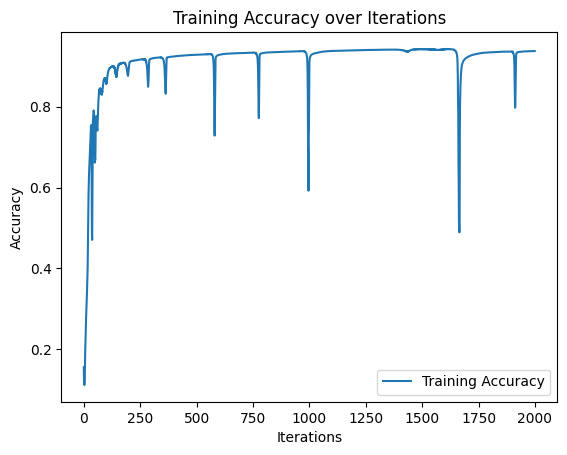

In [ ]:
# Training the neural network using gradient descent
# x_data: Training data
# y_array: Corresponding labels for the training data,to be transposed with shape (1, 60000)
# alpha: Learning rate for gradient descent
# iterations: Number of iterations for training
W1, b1, W2, b2, accuracies = gradient_descent(x_data.T, y_array.T, alpha=0.5, iterations=2000)
plot_training_accuracy(accuracies)

In [ ]:
# Make predictions on the test data using the trained parameters
# x_test: Test data for which predictions are to be made
# W1, b1, W2, b2: Trained parameters of the neural network
pred_test1 = make_predictions(x_test.T, W1 ,b1, W2, b2)

In [ ]:
# Create a DataFrame
df = pd.DataFrame({"Id": range(1, len(pred_test1) + 1), "Expected": pred_test1.T})

# Write DataFrame to a CSV file
#

In [ ]:
df.to_csv("submission_34.csv", index=False)

After several tunings of the model, an alpha(learning rate) of 0.5 over 2000 iterations gave the best Kaggle score of 0.93966 for  the low-level implementation

# Best Performing Model

We selected PyTorch libraries to construct Convolutional Neural Networks (CNNs), recognizing their superior capability in handling image data, particularly for tasks like the MNIST digit classification.

The architecture of CNNs, with their hierarchical layering, excels in capturing the intricate patterns and features within images, making them exceptionally suited for identifying the subtle differences in the handwritten digits of the MNIST dataset. This strategic choice allows us to not only harness the computational efficiency and flexibility of PyTorch but also to tap into the advanced feature extraction capabilities of CNNs, setting a solid foundation for our digit classification task.

In [ ]:
# Splitting the dataset
x_train, x_val, y_train, y_val = train_test_split(x_data, y_array, test_size=0.2, random_state=42)


# Convert the pandas dataframes and numpy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Removed .values
x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)  # Removed .values


## Defining the Classifier Model

In [ ]:
class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm layer for conv1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm layer for conv2

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers with fewer neurons
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Adjusted for the pooling and reduced filters
        self.fc2 = nn.Linear(128, 10)

        # Non-linear activations and dropout
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(0.25)

        # Apply He initialization to the layers
        init.kaiming_normal_(self.conv1.weight, nonlinearity='leaky_relu')
        init.kaiming_normal_(self.conv2.weight, nonlinearity='leaky_relu')
        init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        # No need to apply He initialization to fc2 because it is the output layer

    def forward(self, x, return_features=False):
        x = self.pool(self.leaky_relu(self.bn1(self.conv1(x))))
        x = self.pool(self.leaky_relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        features = self.leaky_relu(self.fc1(x))
        if return_features:
            return features
        x = self.dropout(features)
        x = self.fc2(x)
        return x


In [ ]:

# Reshape the data to [batch_size, channels, height, width]
x_train_tensor_reshaped = x_train_tensor.view(-1, 1, 28, 28)
x_val_tensor_reshaped = x_val_tensor.view(-1, 1, 28, 28)


# Ensure the tensors are on the correct device (GPU if available) before passing them through the model
if torch.cuda.is_available():
    x_train_tensor_reshaped = x_train_tensor_reshaped.to('cuda')
    x_val_tensor_reshaped = x_val_tensor_reshaped.to('cuda')


# Initialize the model and move it to the appropriate device
model = ModifiedCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Prepare DataLoader for training and validation data
train_dataset = TensorDataset(x_train_tensor_reshaped, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor_reshaped, y_val_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=90, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=90)

Epoch 1/25
Training Loss: 0.0041, Training Accuracy: 0.9986
Validation Loss: 0.0450, Validation Accuracy: 0.9920
Epoch 2/25
Training Loss: 0.0040, Training Accuracy: 0.9985
Validation Loss: 0.0458, Validation Accuracy: 0.9921
Epoch 3/25
Training Loss: 0.0024, Training Accuracy: 0.9991
Validation Loss: 0.0548, Validation Accuracy: 0.9917
Epoch 4/25
Training Loss: 0.0027, Training Accuracy: 0.9991
Validation Loss: 0.0438, Validation Accuracy: 0.9930
Epoch 5/25
Training Loss: 0.0052, Training Accuracy: 0.9983
Validation Loss: 0.0475, Validation Accuracy: 0.9927
Epoch 6/25
Training Loss: 0.0038, Training Accuracy: 0.9987
Validation Loss: 0.0479, Validation Accuracy: 0.9930
Epoch 7/25
Training Loss: 0.0022, Training Accuracy: 0.9993
Validation Loss: 0.0440, Validation Accuracy: 0.9924
Epoch 8/25
Training Loss: 0.0037, Training Accuracy: 0.9990
Validation Loss: 0.0552, Validation Accuracy: 0.9919
Epoch 9/25
Training Loss: 0.0025, Training Accuracy: 0.9992
Validation Loss: 0.0445, Validation 

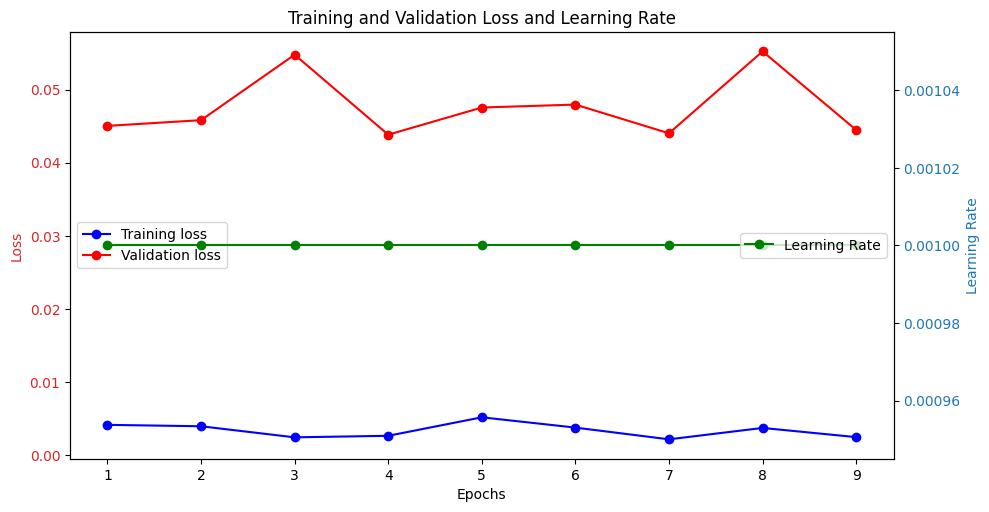

In [ ]:
def calculate_accuracy(y_true, y_pred):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y_true).sum().item()
    return correct / y_true.size(0)


def plot_losses(train_losses, val_losses, learning_rates):
    epochs = range(1, len(train_losses) + 1)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='tab:red')
    ax1.plot(epochs, train_losses, 'bo-', label='Training loss')
    ax1.plot(epochs, val_losses, 'ro-', label='Validation loss')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Learning Rate', color='tab:blue')
    ax2.plot(epochs, learning_rates, 'go-', label='Learning Rate')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Training and Validation Loss and Learning Rate')
    ax1.legend(loc='center left')
    ax2.legend(loc='center right')
    plt.show()

# Save the best model
best_model_state = None

# Set up early stopping parameters
patience = 5
best_val_loss = float('inf')
counter_early_stop = 0
early_stop = False
# Initialize the ReduceLROnPlateau scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=5, verbose=True)

epochs = 25
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
learning_rates = []  # List to store learning rates

for epoch in range(epochs):
    if early_stop:
        break

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)
        correct += (output.argmax(1) == target).type(torch.float).sum().item()
        total += target.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
      for data, target in val_loader:
          data, target = data.to(device), target.to(device)
          output = model(data)
          loss = criterion(output, target)
          running_loss += loss.item() * data.size(0)
          correct += (output.argmax(1) == target).type(torch.float).sum().item()
          total += target.size(0)

    val_loss = running_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    # Reduce LR if no improvement is seen in validation loss
    scheduler.step(val_loss)


    print(f'Epoch {epoch+1}/{epochs}')
    print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Check for learning rate adjustment
    learning_rates.append(optimizer.param_groups[0]['lr'])  # Append the current learning rate

    # Early stopping check
    if val_loss < best_val_loss:
      best_val_loss = val_loss
      counter_early_stop = 0
    else:
        counter_early_stop += 1
        if counter_early_stop >= patience:
              print('Early stopping!')
              early_stop = True
              break


# Plot the training and validation losses
plot_losses(train_losses, val_losses, learning_rates)




In [ ]:


# List to hold the features and labels
features_list = []
labels_list = []

with torch.no_grad():
    for data, target in val_loader:
        data, target = data.to(device), target.to(device)
        features = model(data, return_features=True)
        features_list.append(features.cpu().numpy())  # Move features to CPU and convert to numpy
        labels_list.append(target.cpu().numpy())

# Concatenate all features and labels
features = np.concatenate(features_list, axis=0)
labels = np.concatenate(labels_list, axis=0)

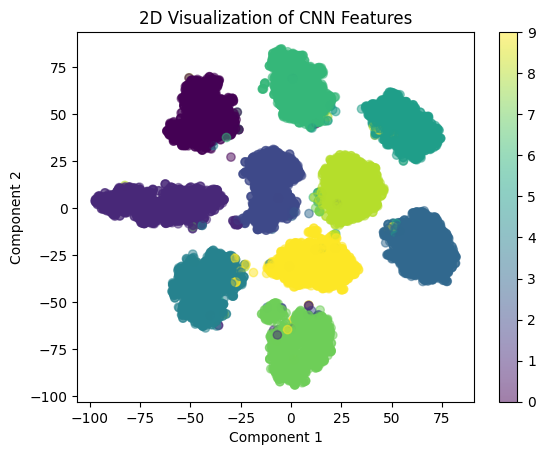

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(features)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('2D Visualization of CNN Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [ ]:
# Assuming model is already trained and available
model.eval()  # Set the model to evaluation mode

# Convert x_test_scaled to a PyTorch tensor
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)

# Reshape your tensor to include a channel dimension
x_test_tensor = x_test_tensor.view(-1, 1, 28, 28)  # Only for CNN, if images are 28x28

# Move the tensor to the same device as the model
if torch.cuda.is_available():
    x_test_tensor = x_test_tensor.to('cuda')

# Perform predictions
with torch.no_grad():  # No need to track the gradients
    output = model(x_test_tensor)

# Get the predicted classes
_, predicted_labels = torch.max(output, 1)

# If you need to move the predictions back to CPU and convert to a numpy array
predicted_labels = predicted_labels.cpu().numpy()

# Now predicted_labels contains the predicted classes for each input in the test set
# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(pd.DataFrame({
    "Id": range(1, len(predicted_labels) + 1),
    "Expected": predicted_labels
}))


# Write the DataFrame to a CSV file
predictions_df.to_csv('/content/drive/MyDrive/CIS_678/challenge_03/preds_cnn_leaky_dropout_lrsche_0330_1.csv', index=False)

print("Predictions written to predictions.csv")

Predictions written to predictions.csv


# Experiments

Throughout this challenge we employed different methods and strategies to improve our models.

## SGD Model

This model performed well on the kaggle without any regularization techniques. However, the MNIST dataset is very well-behaved and clean and so we do not believe this model would generalize well on real world data.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Split data into train and validation sets
from sklearn.model_selection import train_test_split
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(x_train, y_array, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Reshape input data to 4-dimensional format
X_train_tensor = X_train_tensor.reshape(-1, 1, 28, 28)
X_val_tensor = X_val_tensor.reshape(-1, 1, 28, 28)
X_test_tensor = X_test_tensor.reshape(-1, 1, 28, 28)

#

# Create DataLoader for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define a neural network model with CNN
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Adjust the input size based on the output size of conv layers
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the output for fully connected layers
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN model
cnn_model = CNNNet()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.6)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function with validation
def train(model, train_loader, val_loader, optimizer, criterion, scheduler, epochs=20):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.squeeze())
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * data.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                val_loss += criterion(output, target.squeeze()).item() * data.size(0)
                _, predicted = torch.max(output, 1)
                total += target.size(0)
                correct += (predicted == target.squeeze()).sum().item()
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        scheduler.step()
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {100 * correct / total:.2f}%")

    return train_losses, val_losses

# Train the CNN model
train_losses, val_losses = train(cnn_model, train_loader, val_loader, optimizer, criterion, scheduler)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

## AutoEncoders

We tried building Autoencoders, however, the autoencoder was not successful in classifying the dataset very well as can be evidenced from the visualization.

We do believe that Autoencoders may not be the right choice for this dataset as the dataset is not complex enough to warrant it and hence did not pursue this path any further.

In [ ]:

# Create a TensorDataset for inputs and targets (which are the same for an autoencoder)
dataset = TensorDataset(x_train_tensor, x_train_tensor)
val_dataset = TensorDataset(x_val_tensor, x_val_tensor)

# Create a DataLoader for your dataset
batch_size = 128  # You can adjust the batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        # More simplified: only one hidden layer before bottleneck
        self.encoder = nn.Sequential(
            nn.Linear(784, 64),  # Directly reducing dimensionality to 64
            nn.ReLU(),
            nn.Linear(64, 32),  # Simplified bottleneck
            nn.ReLU()
        )

        # Decoder
        # Simplified: only one layer before restoring original dimension
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 784),
            nn.Sigmoid()  # Ensuring output is in the range [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [ ]:
autoencoder = Autoencoder()
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0001)  # Adam optimizer


In [ ]:
# Training the autoencoder
def train_autoencoder(autoencoder, train_loader, val_loader, num_epochs=200, patience=10):
    # Assuming criterion and optimizer are defined outside this function
    # You might need to pass them as arguments if they're not globally accessible

    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    counter_early_stop = 0
    early_stop = False

    for epoch in range(num_epochs):
        autoencoder.train()  # Set the model to training mode
        running_loss_train = 0.0

        for imgs, _ in train_loader:  # Assuming labels are not needed
            imgs = imgs.float()
            if torch.cuda.is_available():
                imgs = imgs.to('cuda')

            output = autoencoder(imgs)
            loss = criterion(output, imgs)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss_train += loss.item() * imgs.size(0)

        epoch_loss_train = running_loss_train / len(train_loader.dataset)
        train_losses.append(epoch_loss_train)

        # Validation phase
        autoencoder.eval()  # Set the model to evaluation mode
        running_loss_val = 0.0
        with torch.no_grad():
            for imgs, _ in val_loader:  # Assuming labels are not needed
                imgs = imgs.float()
                if torch.cuda.is_available():
                    imgs = imgs.to('cuda')

                output = autoencoder(imgs)
                loss = criterion(output, imgs)

                running_loss_val += loss.item() * imgs.size(0)

        epoch_loss_val = running_loss_val / len(val_loader.dataset)
        val_losses.append(epoch_loss_val)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss_train:.4f}, Val Loss: {epoch_loss_val:.4f}')

        # Early stopping logic
        if epoch_loss_val < best_val_loss:
            best_val_loss = epoch_loss_val
            counter_early_stop = 0
        else:
            counter_early_stop += 1
            if counter_early_stop >= patience:
                print(f'Early stopping triggered at epoch {epoch+1}.')
                early_stop = True
                break

    return train_losses, val_losses

# Assuming you have already defined and initialized 'autoencoder', 'criterion', and 'optimizer'
# Also assuming 'train_loader' and 'val_loader' are your DataLoader instances for training and validation datasets

# Example usage
num_epochs = 50
patience = 5
train_losses, val_losses = train_autoencoder(autoencoder, dataloader, val_loader, num_epochs, patience)

# Function to plot training and validation losses
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

plot_losses(train_losses, val_losses)

In [ ]:
# After training the autoencoder
autoencoder.eval()

# Extract encoded features for visualization
with torch.no_grad():
    encoded_features = autoencoder.encoder(x_val_tensor).cpu().numpy()

# For a 2D or 3D encoded space, directly plot the features (adjust indices for higher dimensions)
if encoded_features.shape[1] == 2:  # If you have a 2D latent space
    plt.scatter(encoded_features[:, 0], encoded_features[:, 1], c=y_val, cmap='viridis')
    plt.colorbar()
    plt.show()
elif encoded_features.shape[1] == 3:  # If you have a 3D latent space
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(encoded_features[:, 0], encoded_features[:, 1], encoded_features[:, 2], c=y_val, cmap='viridis')
    plt.show()

# Use t-SNE for higher-dimensional spaces
if encoded_features.shape[1] > 3:
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2)
    tsne_results = tsne.fit_transform(encoded_features)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_val, cmap='viridis')
    plt.colorbar()
    plt.show()

## ResNets

Residual Networks (ResNets) are a type of deep neural networks that makes use of skip connections by stacking the residual blocks together.
They help in stabilizing the gradient flow as well as enable us to understand partial logic by selectively passing of identity.

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        # Initial input conv
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(ResidualBlock, 32, 32, 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 64, 2)
        self.layer3 = self.make_layer(ResidualBlock, 64, 128, 2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 256, 2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, 10)

    def make_layer(self, block, in_channels, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (in_channels != out_channels):
            downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(in_channels, out_channels, stride, downsample))
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = ResNet()

In [ ]:

# Reshape the data to [batch_size, channels, height, width]
x_train_tensor_reshaped = x_train_tensor.view(-1, 1, 28, 28)
x_val_tensor_reshaped = x_val_tensor.view(-1, 1, 28, 28)

# Forward pass through the encoder only
# Ensure the tensors are on the correct device (GPU if available) before passing them through the model
if torch.cuda.is_available():
    x_train_tensor_reshaped = x_train_tensor_reshaped.to('cuda')
    x_val_tensor_reshaped = x_val_tensor_reshaped.to('cuda')


# Initialize the model and move it to the appropriate device
model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Prepare DataLoader for training and validation data
train_dataset = TensorDataset(x_train_tensor_reshaped, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor_reshaped, y_val_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=256)

In [ ]:
def calculate_accuracy(y_true, y_pred):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y_true).sum().item()
    return correct / y_true.size(0)

def plot_losses(train_losses, val_losses, learning_rates):
    epochs = range(1, len(train_losses) + 1)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='tab:red')
    ax1.plot(epochs, train_losses, 'bo-', label='Training loss')
    ax1.plot(epochs, val_losses, 'ro-', label='Validation loss')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Learning Rate', color='tab:blue')  # we already handled the x-label with ax1
    ax2.plot(epochs, learning_rates, 'go-', label='Learning Rate')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Training and Validation Loss and Learning Rate')
    ax1.legend(loc='center left')
    ax2.legend(loc='center right')
    plt.show()

# Set up early stopping parameters
epochs = 25
patience = 5
best_val_loss = float('inf')
counter_early_stop = 0
early_stop = False
# Initialize the ReduceLROnPlateau scheduler
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=epochs)


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
learning_rates = []  # List to store learning rates
#writer = SummaryWriter('runs/mnist')

for epoch in range(epochs):
    if early_stop:
        break

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)
        correct += (output.argmax(1) == target).type(torch.float).sum().item()
        total += target.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    # Log training metrics
    # writer.add_scalar('Loss/Train', train_loss, epoch)
    # writer.add_scalar('Accuracy/Train', train_accuracy, epoch)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            running_loss += loss.item() * data.size(0)
            correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total += target.size(0)

    val_loss = running_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    # Reduce LR if no improvement is seen in validation loss
    scheduler.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])

    print(f'Epoch {epoch+1}/{epochs}')
    print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter_early_stop = 0
    else:
        counter_early_stop += 1
        if counter_early_stop >= patience:
            print('Early stopping!')
            early_stop = True
    # Log validation metrics
    # writer.add_scalar('Loss/Validation', val_loss, epoch)
    # writer.add_scalar('Accuracy/Validation', val_accuracy, epoch)
    #%tensorboard --logdir runs
# Plot the training and validation losses
plot_losses(train_losses, val_losses, learning_rates)



# Results


In our exploration of the MNIST dataset classification challenge, we gleaned several insightful takeaways that have both broadened our understanding and sharpened our skills in machine learning:

Convolutional Neural Networks (CNNs) demonstrated remarkable efficiency, reaffirming their robustness in handling image data.
Although PyTorch presents an initial learning curve, its flexibility and comprehensive framework proved invaluable in constructing both efficient and powerful deep neural networks.
The concept and implementation of Residual Networks (ResNets) were key highlights, showcasing the impact of innovative architecture in deep learning.
Our journey underscored the importance of model simplicity and efficiency, reminding us that a well-designed, streamlined model often outperforms a complex one.
This project has not only enriched our practical knowledge but has also emphasized the philosophy that in machine learning, simplicity and clarity can lead to exceptional performance.


# Conclusion

Navigating the nuances of the MNIST dataset has reinforced a vital lesson: more isn't always better when it comes to model complexity. In the world of machine learning, there's a sweet spot between iterating for improvement and spinning into over-engineering. Knowing when to put down the tools and step back is just as crucial as building the solution. After all, sometimes the best move is to keep it simple and let the data speak for itself.